In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -q /content/drive/MyDrive/Banana_Leaf_Disease_Dataset_Bangladesh.zip -d /content/drive/MyDrive/Banana_Leaf_Disease_Dataset_Bangladesh

replace /content/drive/MyDrive/Banana_Leaf_Disease_Dataset_Bangladesh/Banana_Leaf_Disease_Dataset_Bangladesh/Banana_Leaf_Disease_Dataset_Bangladesh/cordana/cordana13.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import os
from PIL import Image

In [ ]:
data_dir="/content/drive/MyDrive/Banana_Leaf_Disease_Dataset_Bangladesh/Banana_Leaf_Disease_Dataset_Bangladesh/Banana_Leaf_Disease_Dataset_Bangladesh"
classes=os.listdir(data_dir)
print("Classes: ", classes)

Classes:  ['cordana', 'fresh', 'pestalotiopsis', 'sigatoka']


**EDA**

In [ ]:
for cls in classes:
  folder_path=os.path.join(data_dir, cls)
  number_images=len(os.listdir(folder_path))
  print(f"{cls}: {number_images} images")

cordana: 100 images
fresh: 107 images
pestalotiopsis: 117 images
sigatoka: 99 images


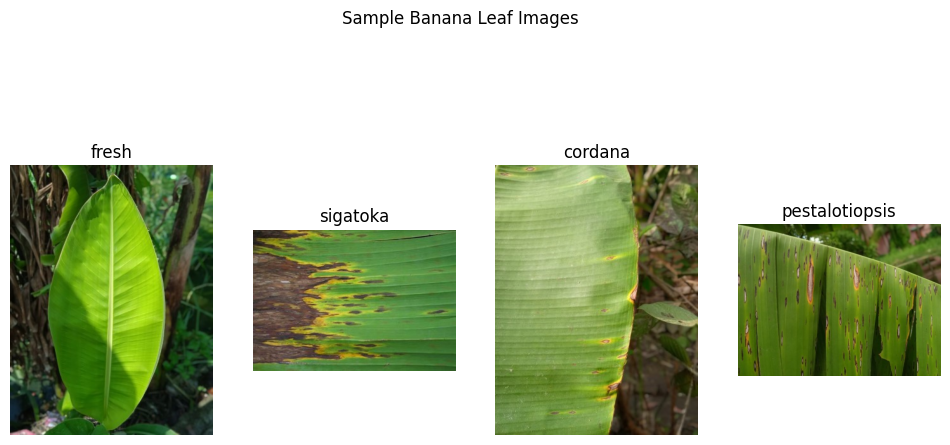

In [ ]:
plt.figure(figsize=(12, 6))

for i, cls in enumerate(random.sample(classes, 4)):
    class_path = os.path.join(data_dir, cls)
    img_name = random.choice(os.listdir(class_path))
    img = Image.open(os.path.join(class_path, img_name))
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.suptitle("Sample Banana Leaf Images")
plt.show()


In [ ]:
img = Image.open(os.path.join(class_path, img_name))
print(f"Image size: {img.size}")

Image size: (427, 320)


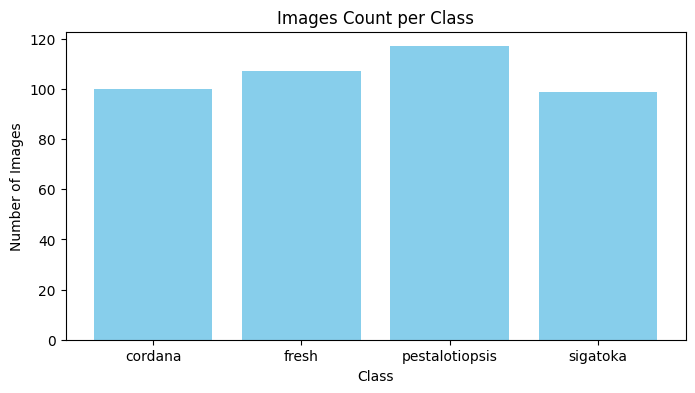

In [ ]:
import matplotlib.pyplot as plt
image_counts = [len(os.listdir(os.path.join(data_dir, cls))) for cls in classes]
plt.figure(figsize=(8, 4))
plt.bar(classes, image_counts, color='skyblue')
plt.title('Images Count per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


**Data Processing and Augmentation**

In [ ]:
data_dir = "/content/drive/MyDrive/Banana_Leaf_Disease_Dataset_Bangladesh/Banana_Leaf_Disease_Dataset_Bangladesh/Banana_Leaf_Disease_Dataset_Bangladesh"
IMG_SIZE = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print("Training classes:", train_data.class_indices)
print("Validation samples:", val_data.samples)

Found 340 images belonging to 4 classes.
Found 83 images belonging to 4 classes.
Training classes: {'cordana': 0, 'fresh': 1, 'pestalotiopsis': 2, 'sigatoka': 3}
Validation samples: 83


Custom CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

CNN_model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Custom CNN Train Model Without early stopping**

In [ ]:
history_cnn = CNN_model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    batch_size=32
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 212s 19s/step - accuracy: 0.3489 - loss: 22.9463 - val_accuracy: 0.2651 - val_loss: 2.7264
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 695ms/step - accuracy: 0.4798 - loss: 23.2806 - val_accuracy: 0.2530 - val_loss: 18.4257
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 589ms/step - accuracy: 0.5219 - loss: 16.8932 - val_accuracy: 0.2771 - val_loss: 13.2997
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 666ms/step - accuracy: 0.4963 - loss: 14.1182 - val_accuracy: 0.3133 - val_loss: 13.0304
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 614ms/step - accuracy: 0.5026 - loss: 6.0281 - val_accuracy: 0.2530 - val_loss: 14.2040
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 638ms/step - accuracy: 0.4385 - loss: 2.3810 - val_accuracy: 0.2289 - val_loss: 10.2275
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 637ms/step - accuracy: 0.4740 - loss: 1.4374 - val_accuracy: 0.2289 - val_loss: 9.2467
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 625ms/step - accuracy: 0.3878 - loss: 1.3002 - val_acc

**Custom CNN Accuracy and loss curve(For Without early stopping)**

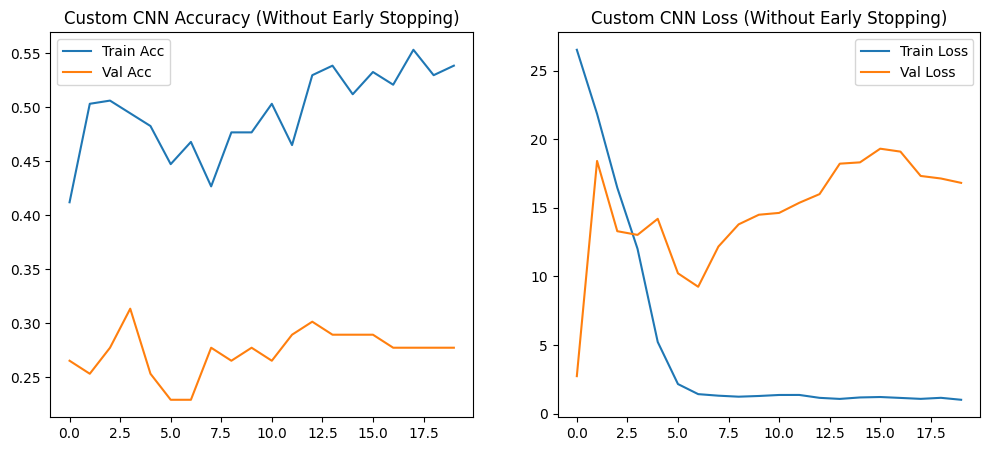

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label='Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='Val Acc')
plt.title('Custom CNN Accuracy (Without Early Stopping)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title('Custom CNN Loss (Without Early Stopping)')
plt.legend()
plt.show()

**Custom CNN tarin Model With early stopping**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_cnn = CNN_model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stop]
)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 711ms/step - accuracy: 0.6082 - loss: 0.9512 - val_accuracy: 0.2771 - val_loss: 15.2852
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 710ms/step - accuracy: 0.5981 - loss: 1.0106 - val_accuracy: 0.2771 - val_loss: 12.9962
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 584ms/step - accuracy: 0.5631 - loss: 1.0216 - val_accuracy: 0.2771 - val_loss: 11.9811
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 713ms/step - accuracy: 0.5796 - loss: 1.0080 - val_accuracy: 0.2771 - val_loss: 10.5176
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 578ms/step - accuracy: 0.5668 - loss: 1.1190 - val_accuracy: 0.2892 - val_loss: 12.4595
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 702ms/step - accuracy: 0.5561 - loss: 1.0419 - val_accuracy: 0.2892 - val_loss: 12.4123
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 579ms/step - accuracy: 0.5463 - loss: 1.0415 - val_accuracy: 0.2771 - val_loss: 10.6843
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 715ms/step - accuracy: 0.6001 - loss: 1.0621 - val_accur

**Custom CNN Accuracy and Loss curve (For with early stopping)**

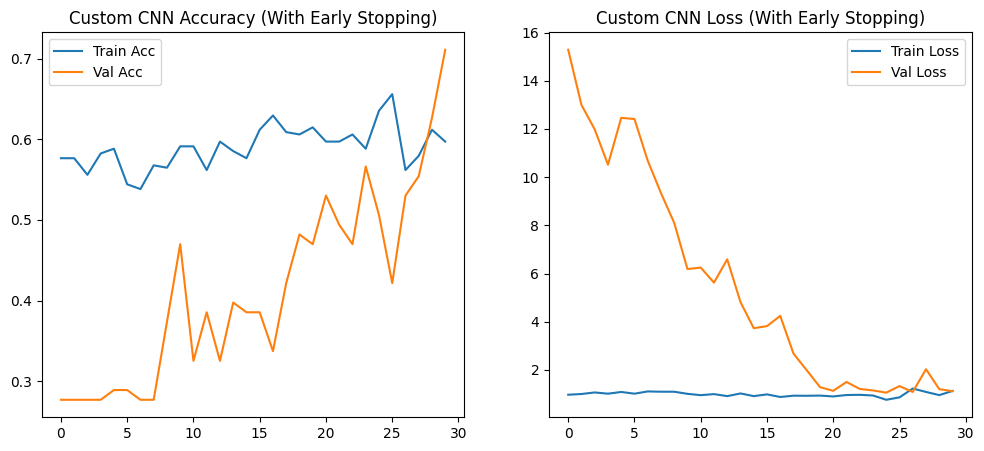

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label='Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='Val Acc')
plt.title('Custom CNN Accuracy (With Early Stopping)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title('Custom CNN Loss (With Early Stopping)')
plt.legend()
plt.show()

**Transfer Learning (VGG16 With two stage fine tuning)**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

vgg_model = Model(inputs=base_model.input, outputs=output)
vgg_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

**VGG16 train(Without early stopping)**

In [ ]:
history_vgg = vgg_model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    batch_size=32
)

for layer in base_model.layers[-4:]:
    layer.trainable = True

vgg_model.compile(optimizer=Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_vgg_finetune = vgg_model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    batch_size=32
)


Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2774 - loss: 1.6747 - val_accuracy: 0.4699 - val_loss: 1.2464
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 628ms/step - accuracy: 0.4971 - loss: 1.2519 - val_accuracy: 0.4096 - val_loss: 1.2069
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 760ms/step - accuracy: 0.5004 - loss: 1.1168 - val_accuracy: 0.4819 - val_loss: 1.1657
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 738ms/step - accuracy: 0.5889 - loss: 1.0118 - val_accuracy: 0.5060 - val_loss: 1.1033
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 614ms/step - accuracy: 0.5233 - loss: 1.0392 - val_accuracy: 0.5904 - val_loss: 1.0564
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 732ms/step - accuracy: 0.5694 - loss: 0.9535 - val_accuracy: 0.6145 - val_loss: 0.9904
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 635ms/step - accuracy: 0.5397 - loss: 0.9372 - val_accuracy: 0.6265 - val_loss: 0.9504
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 737ms/step - accuracy: 0.6501 - loss: 0.8322 - val_accuracy: 0.56

**VGG16 Accuracy and Loss curve(Without early stopping)**

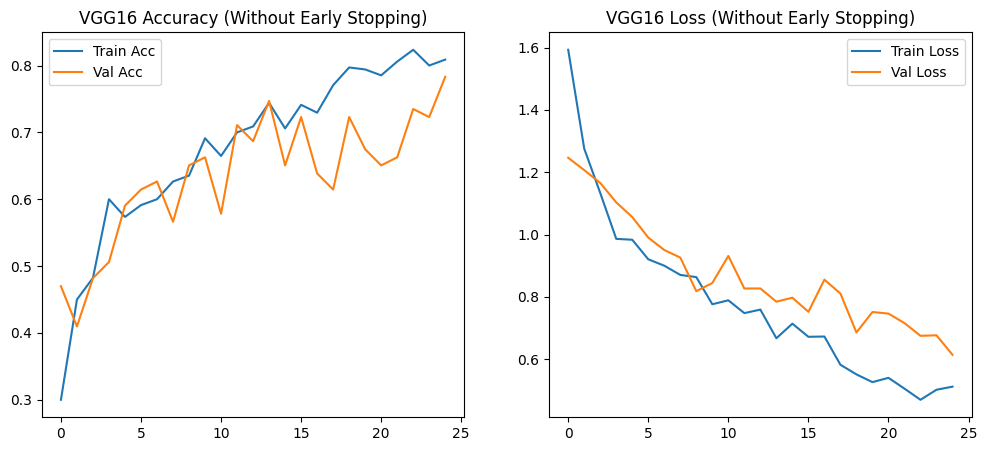

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_vgg.history['accuracy'] + history_vgg_finetune.history['accuracy'], label='Train Acc')
plt.plot(history_vgg.history['val_accuracy'] + history_vgg_finetune.history['val_accuracy'], label='Val Acc')
plt.title('VGG16 Accuracy (Without Early Stopping)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_vgg.history['loss'] + history_vgg_finetune.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'] + history_vgg_finetune.history['val_loss'], label='Val Loss')
plt.title('VGG16 Loss (Without Early Stopping)')
plt.legend()
plt.show()

**VGG16 train(With early stopping)**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_vgg = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history_vgg_es = vgg_model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop_vgg]
)

for layer in base_model.layers[-4:]:
    layer.trainable = True

vgg_model.compile(optimizer=Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_vgg_es_finetune = vgg_model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    batch_size=32,
    callbacks=[early_stop_vgg]
)


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 805ms/step - accuracy: 0.8110 - loss: 0.4723 - val_accuracy: 0.7349 - val_loss: 0.6397
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 742ms/step - accuracy: 0.8561 - loss: 0.3891 - val_accuracy: 0.7590 - val_loss: 0.6118
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 637ms/step - accuracy: 0.8143 - loss: 0.4638 - val_accuracy: 0.7470 - val_loss: 0.5465
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 738ms/step - accuracy: 0.8810 - loss: 0.3847 - val_accuracy: 0.7590 - val_loss: 0.5658
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 635ms/step - accuracy: 0.8163 - loss: 0.4695 - val_accuracy: 0.6747 - val_loss: 0.6284
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 739ms/step - accuracy: 0.8726 - loss: 0.3494 - val_accuracy: 0.7952 - val_loss: 0.5303
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 687ms/step - accuracy: 0.9090 - loss: 0.3055 - val_accuracy: 0.7590 - val_loss: 0.5912
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 661ms/step - accuracy: 0.8688 - loss: 0.3622 - val_accuracy: 0.

**VGG16 Accuracy and Loss curve(with early stopping)**

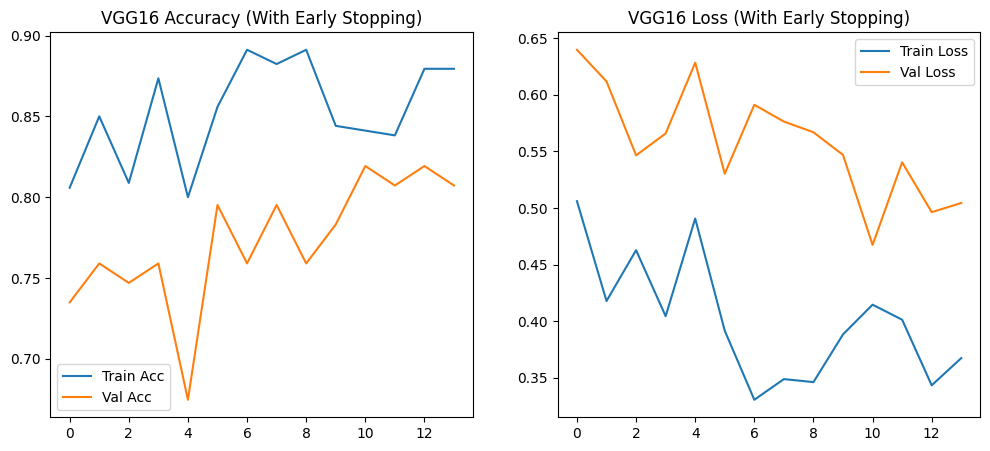

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_vgg_es.history['accuracy'] + history_vgg_es_finetune.history['accuracy'], label='Train Acc')
plt.plot(history_vgg_es.history['val_accuracy'] + history_vgg_es_finetune.history['val_accuracy'], label='Val Acc')
plt.title('VGG16 Accuracy (With Early Stopping)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_vgg_es.history['loss'] + history_vgg_es_finetune.history['loss'], label='Train Loss')
plt.plot(history_vgg_es.history['val_loss'] + history_vgg_es_finetune.history['val_loss'], label='Val Loss')
plt.title('VGG16 Loss (With Early Stopping)')
plt.legend()
plt.show()


**Confusion matrix for Custom CNN Without Early Stopping**

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 608ms/step


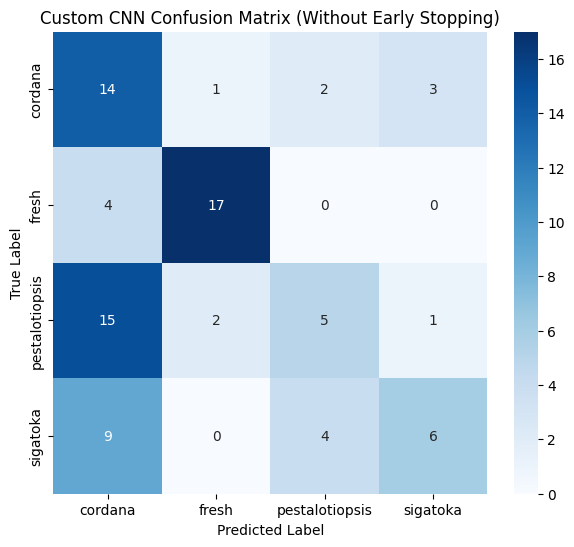


Classification Report (Custom CNN - Without Early Stopping):

                precision    recall  f1-score   support

       cordana       0.33      0.70      0.45        20
         fresh       0.85      0.81      0.83        21
pestalotiopsis       0.45      0.22      0.29        23
      sigatoka       0.60      0.32      0.41        19

      accuracy                           0.51        83
     macro avg       0.56      0.51      0.50        83
  weighted avg       0.56      0.51      0.49        83



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred_cnn = CNN_model.predict(val_data)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
y_true_cnn = val_data.classes
class_labels = list(val_data.class_indices.keys())

cm_cnn = confusion_matrix(y_true_cnn, y_pred_classes_cnn)

plt.figure(figsize=(7,6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Custom CNN Confusion Matrix (Without Early Stopping)')
plt.show()

print("\nClassification Report (Custom CNN - Without Early Stopping):\n")
print(classification_report(y_true_cnn, y_pred_classes_cnn, target_names=class_labels))


**Confusion matrix for Custom CNN With Early Stopping**

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 361ms/step


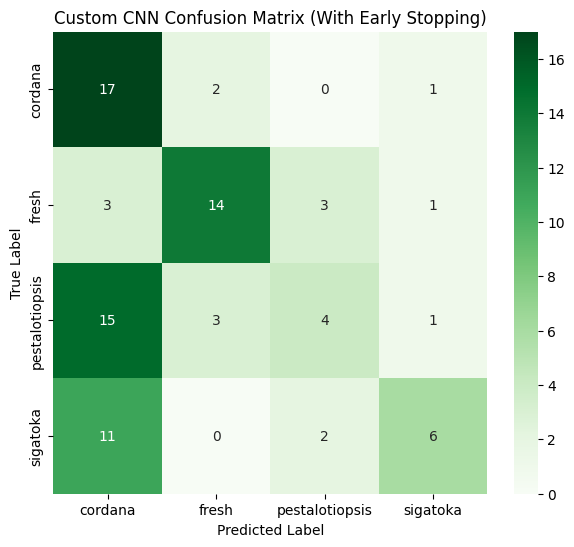


Classification Report (Custom CNN - With Early Stopping):

                precision    recall  f1-score   support

       cordana       0.37      0.85      0.52        20
         fresh       0.74      0.67      0.70        21
pestalotiopsis       0.44      0.17      0.25        23
      sigatoka       0.67      0.32      0.43        19

      accuracy                           0.49        83
     macro avg       0.55      0.50      0.47        83
  weighted avg       0.55      0.49      0.47        83



In [ ]:
y_pred_cnn_es = CNN_model.predict(val_data)
y_pred_classes_cnn_es = np.argmax(y_pred_cnn_es, axis=1)
y_true_cnn_es = val_data.classes

cm_cnn_es = confusion_matrix(y_true_cnn_es, y_pred_classes_cnn_es)

plt.figure(figsize=(7,6))
sns.heatmap(cm_cnn_es, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Custom CNN Confusion Matrix (With Early Stopping)')
plt.show()

print("\nClassification Report (Custom CNN - With Early Stopping):\n")
print(classification_report(y_true_cnn_es, y_pred_classes_cnn_es, target_names=class_labels))

**Confusion matrix for VGG16 Without Early Stopping**

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 412ms/step


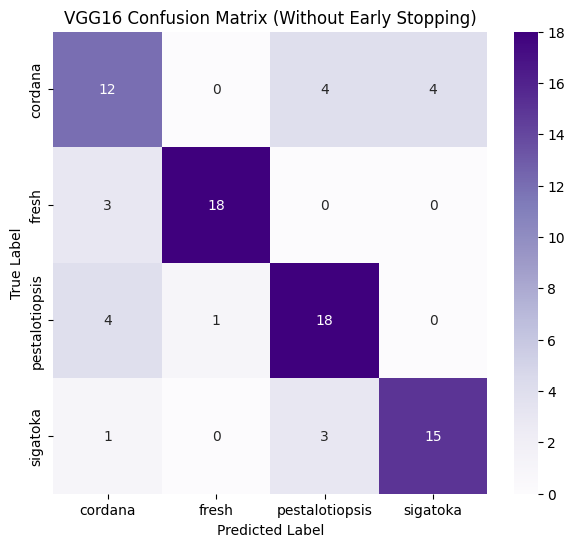


Classification Report (VGG16 - Without Early Stopping):

                precision    recall  f1-score   support

       cordana       0.60      0.60      0.60        20
         fresh       0.95      0.86      0.90        21
pestalotiopsis       0.72      0.78      0.75        23
      sigatoka       0.79      0.79      0.79        19

      accuracy                           0.76        83
     macro avg       0.76      0.76      0.76        83
  weighted avg       0.76      0.76      0.76        83



In [ ]:
y_pred_vgg = vgg_model.predict(val_data)
y_pred_classes_vgg = np.argmax(y_pred_vgg, axis=1)
y_true_vgg = val_data.classes

cm_vgg = confusion_matrix(y_true_vgg, y_pred_classes_vgg)

plt.figure(figsize=(7,6))
sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('VGG16 Confusion Matrix (Without Early Stopping)')
plt.show()

print("\nClassification Report (VGG16 - Without Early Stopping):\n")
print(classification_report(y_true_vgg, y_pred_classes_vgg, target_names=class_labels))

**Confusion matrix for VGG16 With Early Stopping**

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step


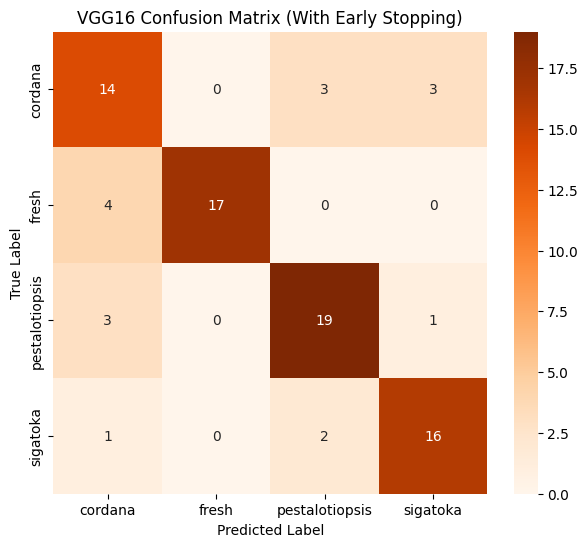


Classification Report (VGG16 - With Early Stopping):

                precision    recall  f1-score   support

       cordana       0.64      0.70      0.67        20
         fresh       1.00      0.81      0.89        21
pestalotiopsis       0.79      0.83      0.81        23
      sigatoka       0.80      0.84      0.82        19

      accuracy                           0.80        83
     macro avg       0.81      0.79      0.80        83
  weighted avg       0.81      0.80      0.80        83



In [ ]:
y_pred_vgg_es = vgg_model.predict(val_data)
y_pred_classes_vgg_es = np.argmax(y_pred_vgg_es, axis=1)
y_true_vgg_es = val_data.classes

cm_vgg_es = confusion_matrix(y_true_vgg_es, y_pred_classes_vgg_es)

plt.figure(figsize=(7,6))
sns.heatmap(cm_vgg_es, annot=True, fmt='d', cmap='Oranges',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('VGG16 Confusion Matrix (With Early Stopping)')
plt.show()

print("\nClassification Report (VGG16 - With Early Stopping):\n")
print(classification_report(y_true_vgg_es, y_pred_classes_vgg_es, target_names=class_labels))
